In [1]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
#connect ke google drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('./drive/MyDrive/NLP2023/vaccination_tweets.csv')

Mounted at /content/drive


In [3]:
# fILE Telah dilaod dari gdrive (file dalam bentuk csv bukan txt) lalu dibuat dalam bentuk tabel dengan pandas dan disimpan di variable df
#intip file
df.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False


In [4]:
#ada kolom apa aja sih?
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [5]:
#cari info datanya secara umum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                2518 non-null   int64 
 1   user_name         2518 non-null   object
 2   user_location     1998 non-null   object
 3   user_description  2394 non-null   object
 4   user_created      2518 non-null   object
 5   user_followers    2518 non-null   int64 
 6   user_friends      2518 non-null   int64 
 7   user_favourites   2518 non-null   int64 
 8   user_verified     2518 non-null   bool  
 9   date              2518 non-null   object
 10  text              2518 non-null   object
 11  hashtags          1884 non-null   object
 12  source            2517 non-null   object
 13  retweets          2518 non-null   int64 
 14  favorites         2518 non-null   int64 
 15  is_retweet        2518 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 280.4+ KB


In [6]:
#kolom nya banyak, kita perlu satu kolom sebagai patokan/acuan atau pointer. Kita pilih kolom id
df.set_index('id', inplace=True)

In [7]:
df.head()


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
id,,,,,,,,,,,,,,,
1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [8]:
#kita nggak perlu tanggal. Drop ajah
df['time'] = pd.to_datetime(df['date'])
df.drop(columns={'date'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 1340539111971516416 to 1344404643661684738
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_name         2518 non-null   object        
 1   user_location     1998 non-null   object        
 2   user_description  2394 non-null   object        
 3   user_created      2518 non-null   object        
 4   user_followers    2518 non-null   int64         
 5   user_friends      2518 non-null   int64         
 6   user_favourites   2518 non-null   int64         
 7   user_verified     2518 non-null   bool          
 8   text              2518 non-null   object        
 9   hashtags          1884 non-null   object        
 10  source            2517 non-null   object        
 11  retweets          2518 non-null   int64         
 12  favorites         2518 non-null   int64         
 13  is_retweet        2518 non-null   bool       

Vader juga punya sentimen analysis untuk emoticon character. Ini bisa digunakan untuk menilai apakah twitter tersebut sentimen nya positif atau negative. Tapi kita perlu dictionary yang perlu kita upload. Vader_lexicon.txt adalah dictionary berisi score sentiment untuk setiap emoticon

In [9]:
#kita perlu file lain
data = pd.read_csv('./drive/MyDrive/NLP2023/vader_lexicon.txt', sep='\t', header=None)
df_sent = pd.DataFrame()
df_sent['token']=data[0]
df_sent['sentiment']=data[1]

df_sent.set_index('token', inplace=True)
df_sent.head()

,sentiment
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [10]:
#codingan untuk membuat text jadi huruf kecil semua
df['text'] = df['text'].str.lower()
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet,time
id,,,,,,,,,,,,,,,
1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,2020-12-20 06:06:44
1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,while the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,2020-12-13 16:27:13
1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,#coronavirus #sputnikv #astrazeneca #pfizerbio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,2020-12-12 20:33:45
1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,"facts are immutable, senator, even when you're...",NaN,Twitter Web App,446,2129,False,2020-12-12 20:23:59
1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,explain to me again why we need a vaccine @bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,2020-12-12 20:17:19


In [15]:
# Bebersih data: Bersihkan dari punctuation
import re
punct_re = r'[^\w\s\n]'
regex = re.compile(punct_re, flags = re.IGNORECASE)
df['no_punc'] = df['text'].replace(to_replace=regex, value=' ')
#kolom text dibersihkan lalu dibuat kolom baru dengan nama 'no punc'

In [16]:
df.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet,time,no_punc
id,,,,,,,,,,,,,,,,
1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,2020-12-20 06:06:44,same folks said daikon paste could treat a cyt...
1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,while the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,2020-12-13 16:27:13,while the world has been on the wrong side of ...
1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,#coronavirus #sputnikv #astrazeneca #pfizerbio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbio...
1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,"facts are immutable, senator, even when you're...",NaN,Twitter Web App,446,2129,False,2020-12-12 20:23:59,facts are immutable senator even when you re...
1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,explain to me again why we need a vaccine @bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,2020-12-12 20:17:19,explain to me again why we need a vaccine bor...
1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False,2020-12-12 20:11:42,does anyone have any useful advice guidance fo...
1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...
1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,there have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False,2020-12-12 20:04:29,there have not been many bright days in 2020 b...
1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,covid vaccine; you getting it?\n\n #covidvacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False,2020-12-12 20:01:16,covid vaccine you getting it \n\n covidvacci...


In [18]:
#Kata-kata dibagian 'no_punc' dipecah (split) dan dimasukan dalam variabel bernama tidy_format'
splitted = df['no_punc'].str.split(expand=True)
stacked = splitted.stack()
tidy_format = stacked.reset_index()
tidy_format = tidy_format.set_index('id')
tidy_format = tidy_format.rename(columns={'level_1': 'num'})
tidy_format.rename(columns = {list(tidy_format)[1]: 'word'}, inplace=True)
tidy_format = tidy_format.rename_axis(None)
tidy_format.head(10)

,num,word
1340539111971516416,0,same
1340539111971516416,1,folks
1340539111971516416,2,said
1340539111971516416,3,daikon
1340539111971516416,4,paste
1340539111971516416,5,could
1340539111971516416,6,treat
1340539111971516416,7,a
1340539111971516416,8,cytokine
1340539111971516416,9,storm


In [25]:
#Merging lagi setelah tiap kata dibandingkan dengan database lexicon, dihitung skor vadernya masing2 lalu dijumlah totalnya
df_merged = pd.merge(df, tidy_format, left_index=True, right_index=True)
df_merged.drop(columns=['num'],inplace=True)
df_merged = pd.merge(df_merged, df_sent, left_on='word', right_index=True)
#df_merged
text_to_sent = df_merged.groupby('text').sum()['sentiment']
text_to_sent = text_to_sent.to_frame('polarity')
text_to_sent
df = pd.merge(df, text_to_sent, left_on='text', right_on='text', right_index=True).fillna(0.0)

<ipython-input-25-082901b035e1>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  text_to_sent = df_merged.groupby('text').sum()['sentiment']


In [26]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet,time,no_punc,polarity_x,polarity_y,polarity
id,,,,,,,,,,,,,,,,,,,
1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,2020-12-20 06:06:44,same folks said daikon paste could treat a cyt...,1.7,1.7,1.7
1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,while the world has been on the wrong side of ...,0.0,Twitter Web App,1,1,False,2020-12-13 16:27:13,while the world has been on the wrong side of ...,-0.4,-0.4,-0.4
1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,#coronavirus #sputnikv #astrazeneca #pfizerbio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbio...,1.0,1.0,1.0
1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,does anyone have any useful advice/guidance fo...,0.0,Twitter for iPhone,0,0,False,2020-12-12 20:11:42,does anyone have any useful advice guidance fo...,3.8,3.8,3.8
1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,2.5,2.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344417967715438593,"Dr FAB, MD",Pakistan,Reality bites & so does my Blog. Dare to indul...,2014-04-20 14:54:05,570,243,12626,False,be scared. be fearful. be petrified. take the ...,"['USA', 'US', 'COVID19', 'COVIDIOT', 'PfizerBi...",Twitter for iPhone,1,0,False,2020-12-30 22:59:56,be scared be fearful be petrified take the ...,-6.6,-6.6,-6.6
1344416210486775808,Valeria Shlyakhto,"Freiburg, Germany","Oncohematology, Bone marrow transplantation - ...",2019-08-23 03:00:51,25,78,67,False,today i’ve got the best present for new year’s...,['CovidVaccine'],Twitter for iPhone,0,11,False,2020-12-30 22:52:57,today i ve got the best present for new year s...,6.4,6.4,6.4
1344413371848921088,Zainab Al-Kharsan,"London, England",Primary Care Network Pharmacist\n@EalingGP @Ne...,2017-07-17 13:22:25,521,370,998,False,very fortunate to have received my first dose ...,['PfizerBioNTech'],Twitter Web App,0,1,False,2020-12-30 22:41:40,very fortunate to have received my first dose ...,1.9,1.9,1.9


In [28]:
#print('Most negative tweets:')
ordered=df[['text','polarity']].sort_values(by='polarity', ascending=False)
ordered.tail()

,text,polarity
id,,
1341373339059822592,@news24 @fin24 public outcry? stop lying 🤥 no ...,-7.1
1341437723295567874,#breaking: dubai emergency crisis and disaster...,-7.3
1343459698834612224,absolutely correct! \nany cleric (no one is ex...,-8.0
1343635127096623104,@oann awful. god have mercy on those being man...,-8.4
1339227682094059520,tragedy. another life taken by corporate greed...,-8.5


In [29]:
df.loc[1339227682094059520]['text']

'tragedy. another life taken by corporate greed and the evil pharmaceutical companies. #vaccination #vaccine… https://t.co/1ycshyqpr6'

In [30]:
#lihat tweet paling positi
ordered.head()

,text,polarity
id,,
1340323755508285446,"just got my safe and effective covid vaccine, ...",10.3
1338704161408348162,take a breath and celebrate what happened toda...,10.0
1339622618073337856,day two of #covidvaccination with #teammft. gr...,9.6
1338923647264841729,“i’m just honored to be one of the first getti...,8.9
1341942727643164673,finally! what a fantastic christmas gift! plea...,8.9


In [31]:
#Load library untuk plotting
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 9)
sns.set()
sns.set_context("talk")

In [ ]:
#mau lihat tweeter yang mengandung kata trump dan pfizer dan distribusi polarity nya
pfizer = df[df['text'].str.contains('pfizer')]
trump = df[df['text'].str.contains('trump')]

sns.distplot(pfizer['polarity'], hist=True, label='pfizer')
sns.distplot(trump['polarity'], hist=True, label='trump')

plt.legend(title='');

<ipython-input-32-c63d0d203fdc>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(science['polarity'], hist=True, label='science')
<ipython-input-32-c63d0d203fdc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fake['polarity'], hist=True, label='fake')


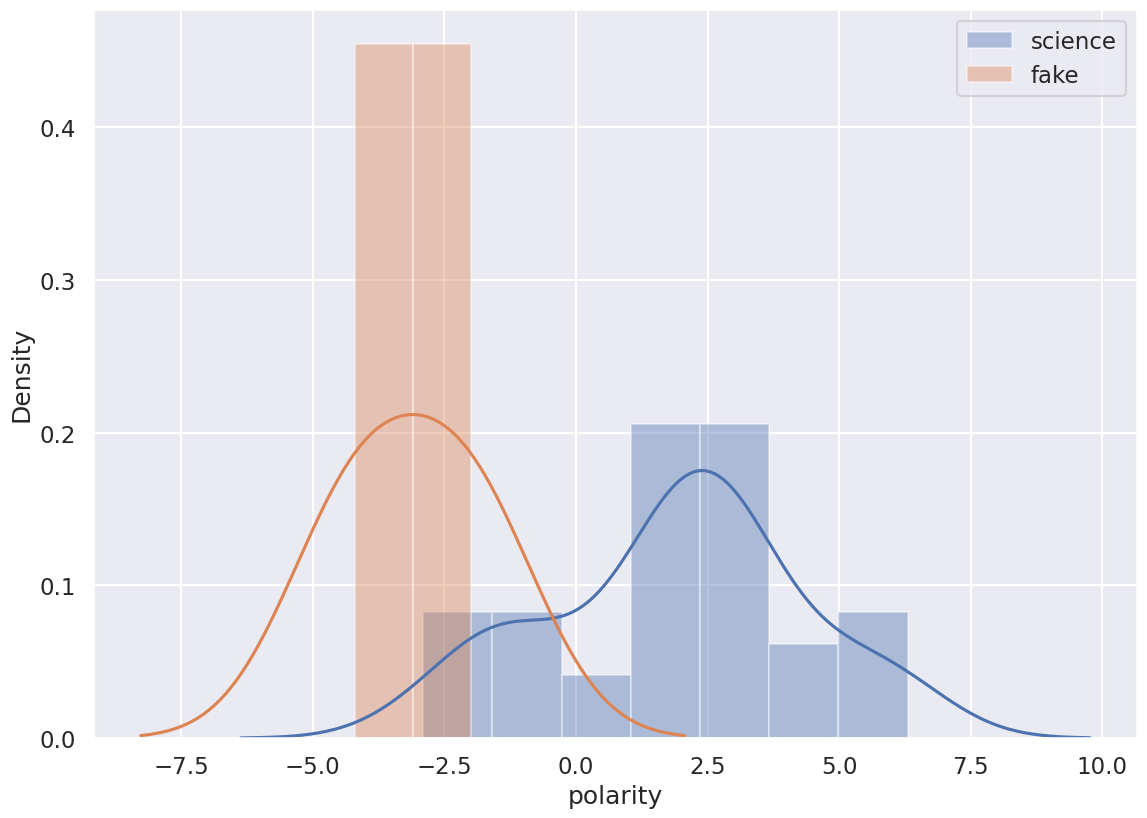

In [32]:
#Mengintip polarity tweet yang mengandung kata science dan fake
science = df[df['text'].str.contains('science')]
fake = df[df['text'].str.contains('fake')]

sns.distplot(science['polarity'], hist=True, label='science')
sns.distplot(fake['polarity'], hist=True, label='fake')

plt.legend(title='');

<ipython-input-33-0359f6dcd89a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['polarity'], hist=True, label='everything')


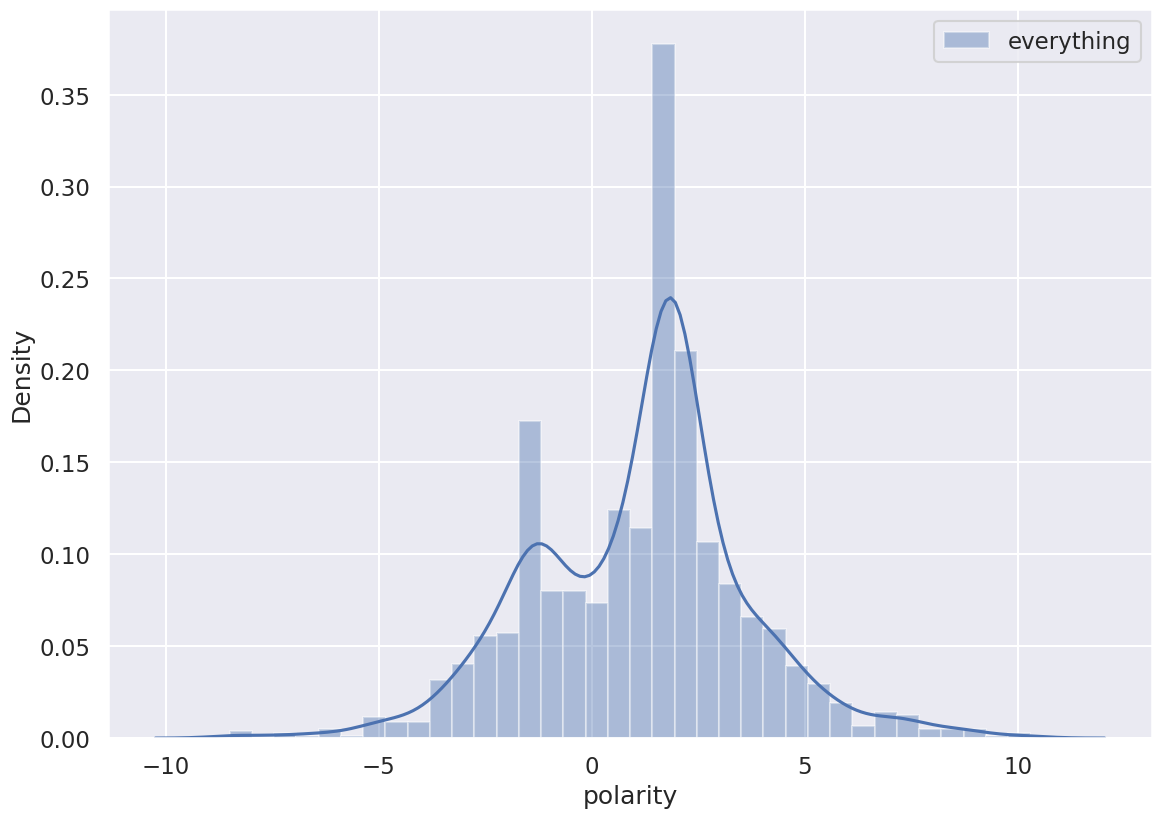

In [33]:
#plot distribusi polarity keseluruhan tweet
sns.distplot(df['polarity'], hist=True, label='everything')
plt.legend(title='');

In [34]:
#Analisis waktu tweet
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length


df['year'] = df['time'].apply(year_fraction)


In [35]:
df['year']

id
1340539111971516416    2020.967213
1338158543359250433    2020.948087
1337858199140118533    2020.945355
1337852648389832708    2020.945355
1337851215875608579    2020.945355
                          ...     
1344417967715438593    2020.994536
1344416210486775808    2020.994536
1344413371848921088    2020.994536
1344408245629235204    2020.994536
1344405690966802433    2020.994536
Name: year, Length: 1511, dtype: float64

<ipython-input-36-a8d5237ae569>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['year'], hist=True)


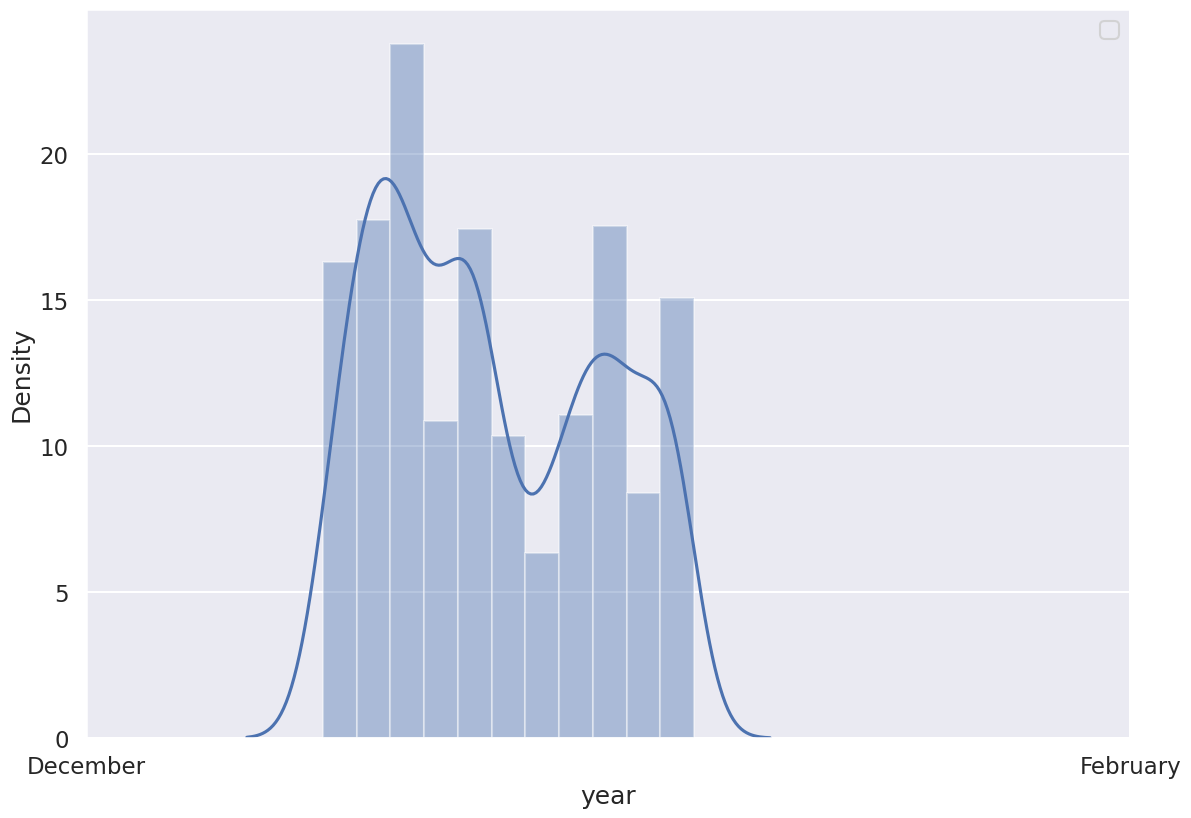

In [36]:
#menghitung tweet per bulan
sns.distplot(df['year'], hist=True)
plt.legend(title='');
plt.xticks([2020.9,2021.1], ['December', 'February']);

<ipython-input-37-afbcd3f6ae78>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['date'],rotation=90);


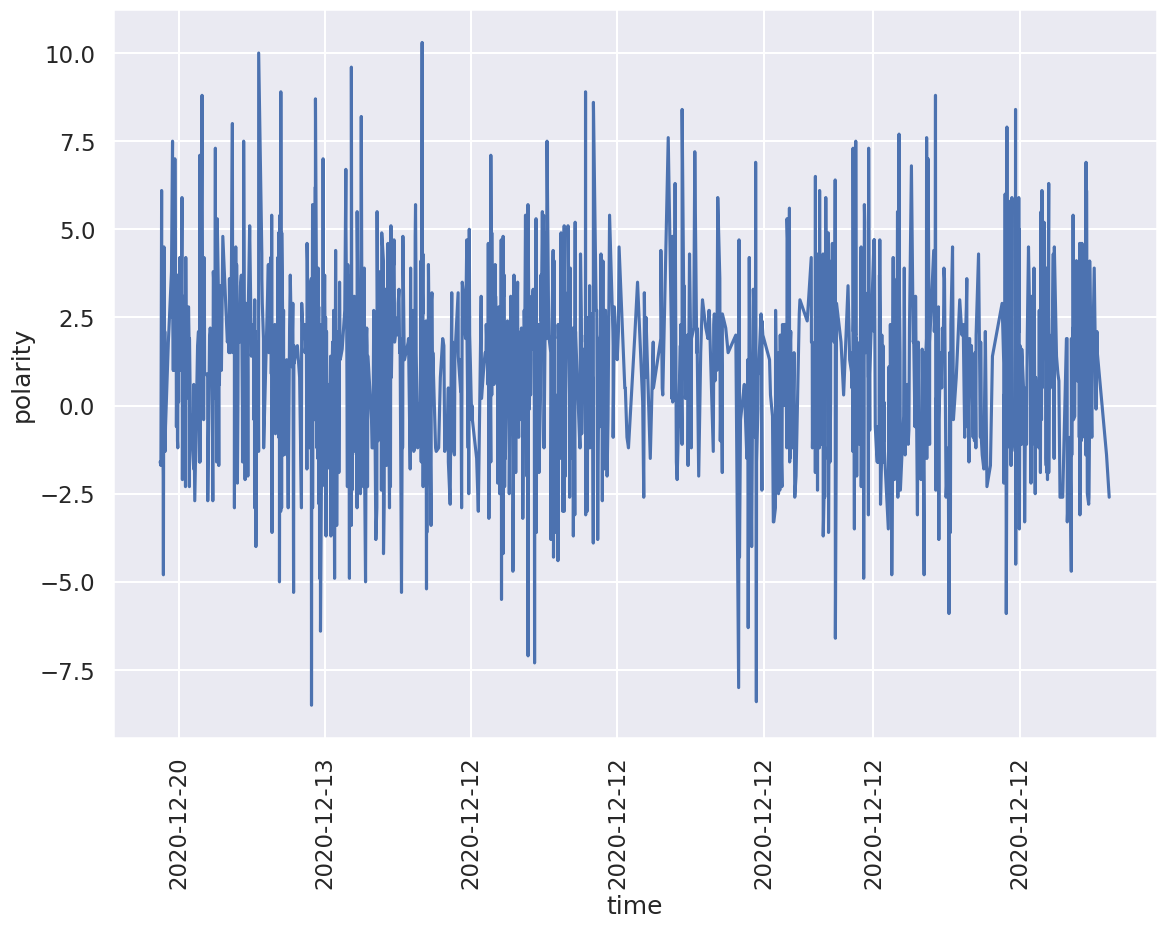

In [37]:
#plot polarity sebagai fungsi waktu tweet
df['date'] = df['time'].dt.date
ax=sns.lineplot(x='time', y='polarity', data=df)
ax.set_xticklabels(df['date'],rotation=90);

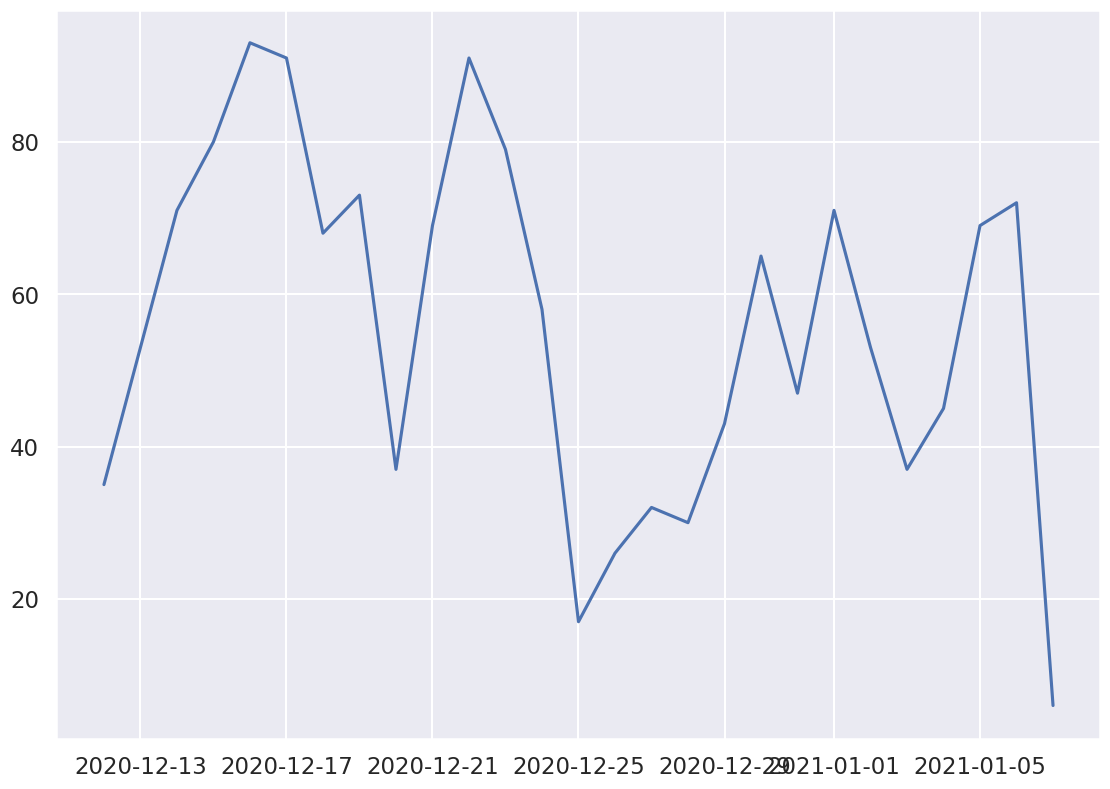

In [38]:
#Jumlah tweet per tanggal
df['date'].value_counts().plot(kind="line");